In [1]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gdf = gpd.read_file("data/행정구역시군구경계/LARD_ADM_SECT_SGG_서울.zip", ) # 원래는 EPSG:5179
gdf = gdf.to_crs("EPSG:4326")


In [7]:
path = Path("./data/DEM/서울특별시/2014 서울특별시[ascii]")
dem = []
for p in path.glob("*.txt"):
    dem.append(pd.read_csv(p, sep=" ", header=None))

dem = pd.concat(dem).reset_index(drop=True)

dem.columns = ["x", "y", "z"]
dem = gpd.GeoDataFrame(
    data=dem.z,
    geometry=gpd.points_from_xy(x=dem.x, y=dem.y),
    crs="EPSG:5186" # 아놔..
)
dem = dem.to_crs("EPSG:4326")


In [10]:
dem

,z,geometry
0,511.02,POINT (127.00251 37.69258)
1,483.44,POINT (127.00251 37.69177)
2,455.26,POINT (127.00251 37.69096)
3,410.37,POINT (127.00251 37.69015)
4,512.67,POINT (127.00353 37.69420)
...,...,...
111532,4.39,POINT (126.95464 37.51896)
111533,6.98,POINT (126.95464 37.51815)
111534,3.56,POINT (126.95464 37.51733)
111535,3.05,POINT (126.95464 37.51652)


In [6]:
df.dem.mean()

98.45886400000157

In [12]:
(np.abs(dem.geometry.y - 37.555649	) + np.abs(dem.geometry.x - 126.910629)).argmax()

76239

In [14]:
dem.loc[76239]

z                                                237.31
geometry    POINT (127.1009077126171 37.69060786801124)
Name: 76239, dtype: object

In [31]:
df =  pd.read_csv("서울시_따릉이대여소별_고도데이터.csv", )


In [35]:
df

,id,name,gu,loc,y,x,ds,slot,dem
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2022-05-03,15.0,9.71
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2022-05-03,14.0,9.36
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2022-05-12,13.0,20.26
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,20.26
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2022-05-12,12.0,16.01
...,...,...,...,...,...,...,...,...,...
2495,4665,응암역3번 출구(서부경찰서 방면),은평구,은평로85 CJ드림시티 A동,37.599670,126.917160,2021-03-19,10.0,17.76
2496,4667,폭포동입구 교차로,은평구,연서로,37.629627,126.930115,2021-03-17,10.0,54.14
2497,4668,기자촌사거리,은평구,진관2로,37.633907,126.931778,2021-03-17,10.0,67.80
2498,4671,청구성심병원 앞,은평구,진관2로,37.620876,126.919800,2021-03-17,10.0,28.20


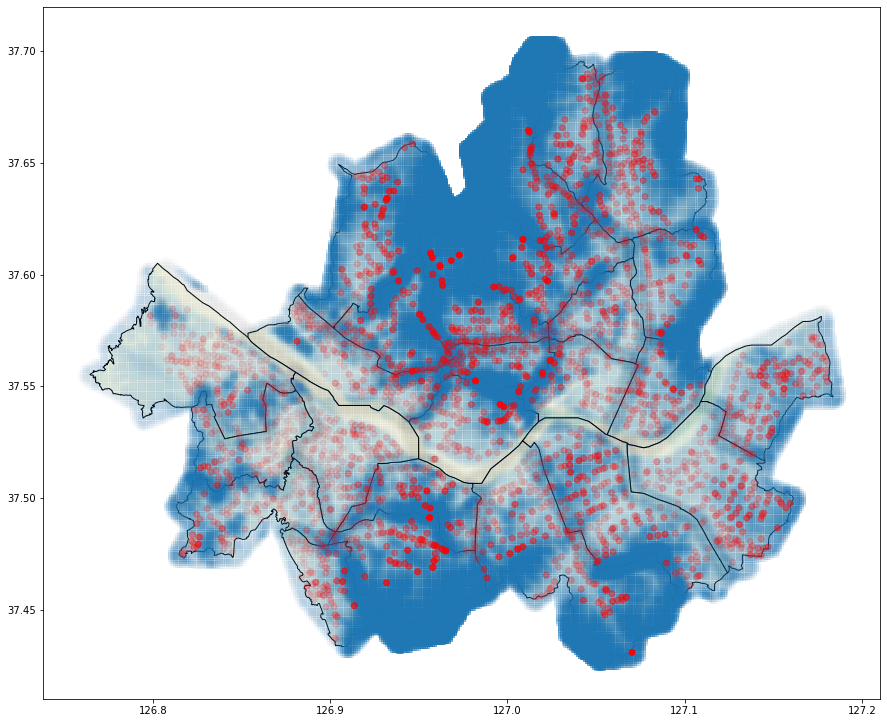

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
gdf.plot(ax=ax, color="ivory", alpha=1, edgecolor="black" )
ax.scatter(dem.geometry.x , dem.geometry.y , alpha=dem.z/dem.z.max(), marker="s")
ax.scatter(df.x , df.y, alpha=(df.dem/df.dem.max()), color="red")